# Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import pandas as pd
plt.rcParams['figure.dpi'] =120
dep2train = pd.read_csv('data/dep2train.csv')
print("Head of training data:")
print(dep2train.head())
dep2test = pd.read_csv('data/dep2test.csv')
print("Head of test data:")
print(dep2test.head())


Head of training data:
         date  weeklySales
0  2010-02-05    123952.48
1  2010-02-12    119209.48
2  2010-02-19    121430.80
3  2010-02-26    120292.15
4  2010-03-05    113163.91
Head of test data:
         date  weeklySales
0  2011-11-04    108655.66
1  2011-11-11    106841.49
2  2011-11-18     98341.91
3  2011-11-25     97213.06
4  2011-12-02     99976.34


In [2]:
from datetime import date
from datetime import timedelta
dep2train['date'] = pd.to_datetime(dep2train['date'])
dep2train['fold'] = 'train'
dep2test['date'] = pd.to_datetime(dep2test['date'])
dep2test['fold'] = 'test'

# Question 1 [Baseline]

In [3]:
new_train=dep2train
new_train['week']=dep2train['date'].dt.weekofyear
print(new_train[:5])
new_test=dep2test
new_test['week']=dep2test['date'].dt.weekofyear
def predict(week):#predict only one
    sales=0
    count=0
    for d in new_train.values:
        if d[3]==week:
            sales+=d[1]
            count+=1
    if count:
        return sales//count
y_pred=[]

for w in dep2test['week']:
    y_pred.append(predict(w))

        date  weeklySales   fold  week
0 2010-02-05    123952.48  train     5
1 2010-02-12    119209.48  train     6
2 2010-02-19    121430.80  train     7
3 2010-02-26    120292.15  train     8
4 2010-03-05    113163.91  train     9


In [4]:
# def predict(date):#predict only one
#     sales=0
#     count=0
#     for d in dep2train.values:
#         if ((d[0]-pd.to_datetime("2010-01-01"))%timedelta(days=365)//timedelta(days=7)) \
#             ==((date-pd.to_datetime("2010-01-01"))%timedelta(days=365)//timedelta(days=7)):
#             sales+=d[1]
#             count+=1
#     if count:
#         return sales//count
# y_pred=[]
# for d in dep2test['date']:
#     y_pred.append(predict(d))

 ### (1) the MAPE of the test period

In [5]:
def mape(y_pred):
    y_pred=np.array(y_pred)
    y_real=np.array(dep2test['weeklySales'])
    res=abs((y_pred-y_real)/y_real)
    res=np.sum(res)/len(y_pred)
    return res
print(mape(y_pred))

0.04358765559169336


### (2) a plot of test data and their predicted value

/Users/chessy/anaconda3/lib/python3.5/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


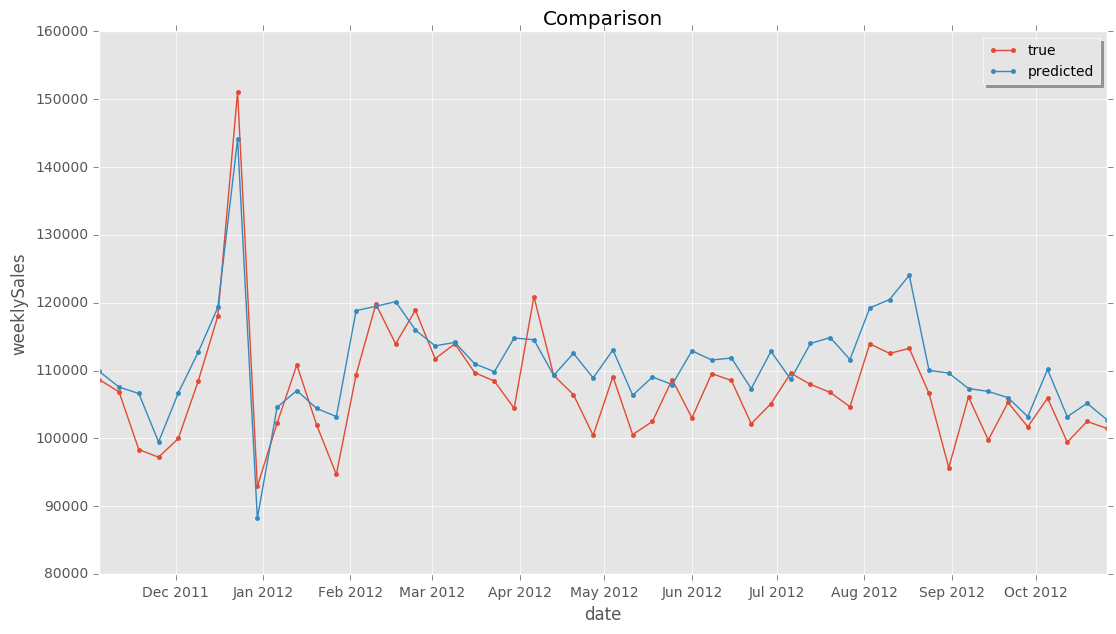

In [6]:
def draw(y_pred):
    plt.style.use('ggplot')
    fig, ax = plt.subplots(dpi= 200, figsize=(len(dep2test['date'])*0.25, 7))
    ax.plot(dep2test['date'], dep2test['weeklySales'], ".-", label="true")
    ax.plot(dep2test['date'], y_pred, ".-", label="predicted")
    legend = ax.legend(loc='upper right', shadow=True, fontsize='medium')
    ax.set(xlabel='date', ylabel='weeklySales', title='Comparison')
    # ax.tick_params(pad=100)
    # ax.tick_params(labelsize=5)
    plt.show()
draw(y_pred)

# Question 2 [Random Forest]

In [7]:
print(dep2train.shape)
print(dep2test.shape)

(91, 4)
(52, 4)


In [8]:
def transform21(df):
    newdf=pd.DataFrame()
    newdf['t-1']=df['weeklySales'].shift(periods=1, freq=None, axis=0)
    newdf['t-2']=df['weeklySales'].shift(periods=2, freq=None, axis=0)
    newdf['t-3']=df['weeklySales'].shift(periods=3, freq=None, axis=0)
    newdf['t-4']=df['weeklySales'].shift(periods=4, freq=None, axis=0)
    newdf['weeklySales']=df['weeklySales']
    newdf=newdf.dropna(axis=0, how='any')
#     print(newdf.head())
    return newdf
result=transform21(pd.concat([dep2train,dep2test]))
print(result[:5])
Q21train=result.iloc[:-52]
Q21test=result.iloc[-52:]
print(Q21train.shape)
print(Q21test.shape)

         t-1        t-2        t-3        t-4  weeklySales
4  120292.15  121430.80  119209.48  123952.48    113163.91
5  113163.91  120292.15  121430.80  119209.48    116637.87
6  116637.87  113163.91  120292.15  121430.80    112732.09
7  112732.09  116637.87  113163.91  120292.15    110240.07
8  110240.07  112732.09  116637.87  113163.91    118392.02
(87, 5)
(52, 5)


In [9]:
def transform22(df):
    newdf=pd.DataFrame()
    newdf['t-1']=df['weeklySales'].shift(periods=1, freq=None, axis=0)
    newdf['t-2']=df['weeklySales'].shift(periods=2, freq=None, axis=0)
    newdf['t-3']=df['weeklySales'].shift(periods=3, freq=None, axis=0)
    newdf['t-4']=df['weeklySales'].shift(periods=4, freq=None, axis=0)
    newdf['t-52']=df['weeklySales'].shift(periods=52, freq=None, axis=0)
    newdf['weeklySales']=df['weeklySales']
    newdf=newdf.dropna(axis=0, how='any')
#     print(newdf.head)
    return newdf
result=transform22(pd.concat([dep2train,dep2test]))
print(result[:5])
Q22train=result.iloc[:-52]
Q22test=result.iloc[-52:]
print(Q22train.shape)
print(Q22test.shape)

          t-1        t-2        t-3        t-4       t-52  weeklySales
52  103200.60  104415.90  107042.54  104581.13  123952.48    113720.83
53  113720.83  103200.60  104415.90  107042.54  119209.48    119715.02
54  119715.02  113720.83  103200.60  104415.90  121430.80    118892.18
55  118892.18  119715.02  113720.83  103200.60  120292.15    111673.55
56  111673.55  118892.18  119715.02  113720.83  113163.91    114097.02
(39, 6)
(52, 6)


In [10]:
from sklearn.ensemble import RandomForestRegressor
# RF = RandomForestRegressor(n_estimators=10, random_state=1, max_depth=10)
# print(temp/np.timedelta64(1, 'D'))
def predict(train,test):
    print(train.shape)
    print(test.shape)
    RF = RandomForestRegressor(n_estimators=100)
    temp=train.drop(columns='weeklySales')
#     print(temp.shape)
    RF.fit(temp, train['weeklySales'])
    temp=test.drop(columns='weeklySales')
#     print(temp.shape)
    y_pred = RF.predict(temp)
#     print(y_pred)
    print(mape(y_pred))
    return y_pred

### Q2.1

(87, 5)
(52, 5)
0.058038086805746875


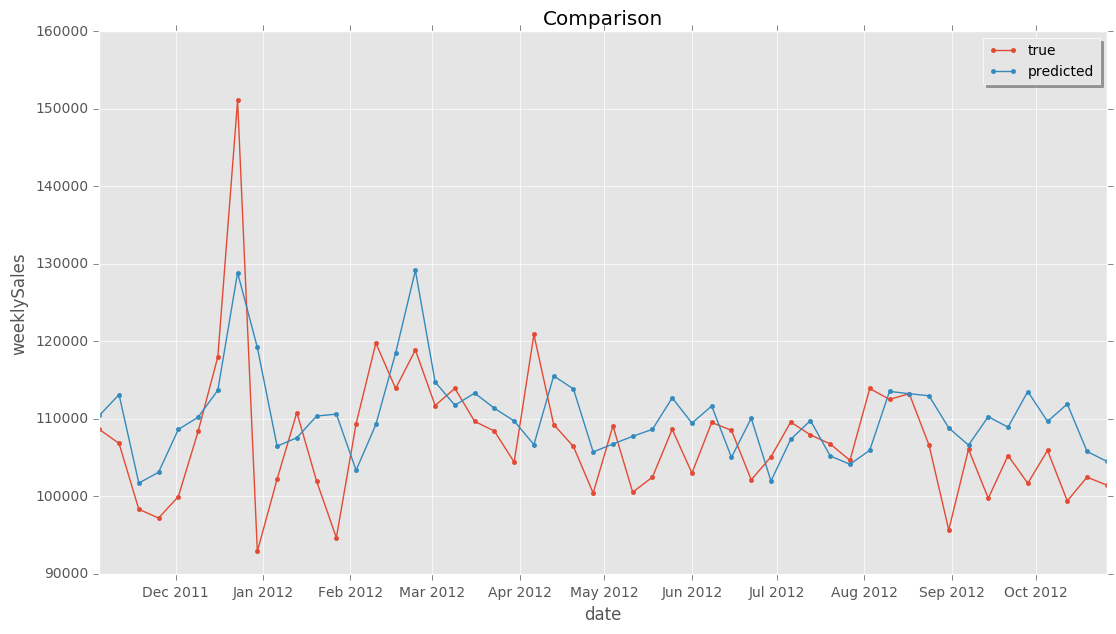

In [11]:
Q21y_pred=predict(Q21train,Q21test)
draw(Q21y_pred)

### Q2.2

(39, 6)
(52, 6)
0.03749990014615913


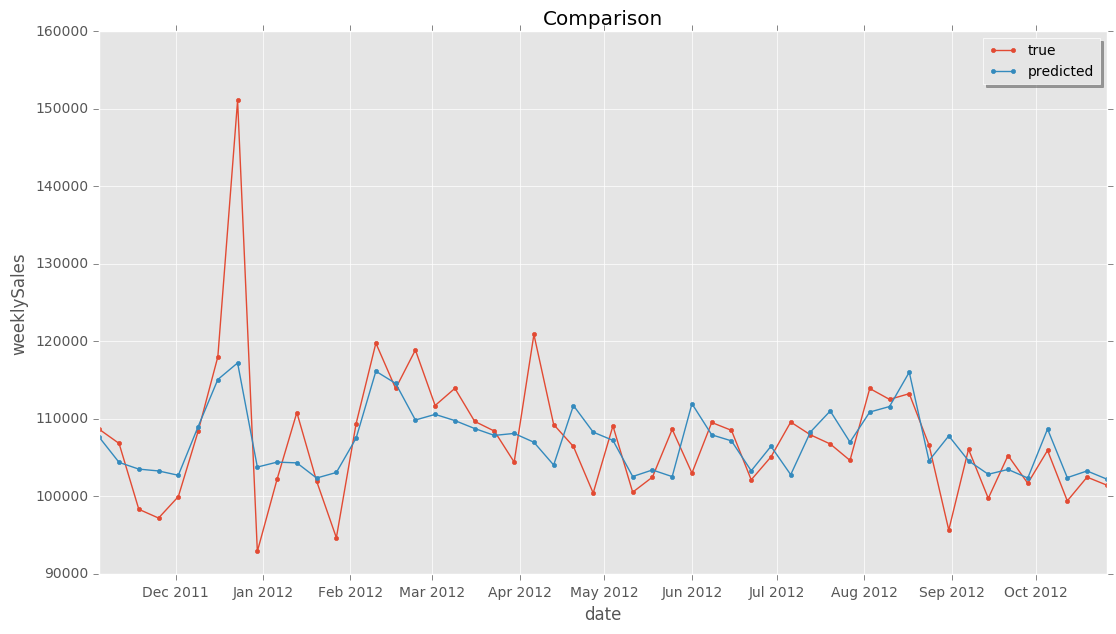

In [12]:
Q22y_pred=predict(Q22train,Q22test)
draw(Q22y_pred)

# Question 3 [Gaussian Process Regression]

### Q3.1 GPR with normalization

In [13]:
# Normalize
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(np.array(dep2train['weeklySales']).reshape(-1,1))
X_test_std = sc.transform(np.array(dep2test['weeklySales']).reshape(-1,1))

In [14]:
#check if the same
xmean=np.mean(dep2train['weeklySales'])
xstd=np.std(dep2train['weeklySales'])
x_train_std=(np.array(dep2train['weeklySales'])-xmean)/xstd
x_test_std=(np.array(dep2test['weeklySales'])-xmean)/xstd

print(x_train_std[:5])
# print(x_test_std)
print(X_train_std[:5])
# print(X_test_std.head())
# inverted = sc.inverse_transform(x_train_std)
# print(inverted[:5])
# print(dep2train['weeklySales'].head())

[1.81083399 1.13686396 1.45250872 1.29070902 0.27780156]
[[1.81083399]
 [1.13686396]
 [1.45250872]
 [1.29070902]
 [0.27780156]]


In [15]:
# kernel = ConstantKernel(0.1, (0.001,0.1))*RBF(0.5,(1e-4,10))+ExpSineSquared()+WhiteKernel()
# ConstantKernel(constant_value=1.0, constant_value_bounds=(0.0, 10.0)) 
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
# k1 = RBF(length_scale=5)  # long term smooth rising trend
# k2 = ExpSineSquared(length_scale=3, periodicity=12)  # seasonal component
# k3 = WhiteKernel(noise_level=1e-05)  # noise terms
# my_kernel = k1 + k2 + k3
my_kernel = RBF() + ExpSineSquared() + WhiteKernel()
gp = GaussianProcessRegressor(kernel=my_kernel)
# temp=np.array((dep2train['date']-pd.to_datetime("2010-01-01"))%timedelta(days=365)//timedelta(days=7)).reshape(-1,1)
temp=np.array(new_train['week']).reshape(-1,1)
gp.fit(temp, x_train_std)
# temp=np.array((dep2test['date']-pd.to_datetime("2010-01-01"))%timedelta(days=365)//timedelta(days=7)).reshape(-1,1)
temp=np.array(new_test['week']).reshape(-1,1)
Q31y_pred, Q31y_std = gp.predict(temp, return_std=True)
print(Q31y_pred)
print(x_test_std)
inverted = sc.inverse_transform(Q31y_pred)

[-0.2297177  -0.48570547 -0.63488996 -1.39077813 -0.54250161  0.2079007
  1.09899937  3.66655755 -2.47899511 -0.81366526 -0.57876819 -0.86129541
 -0.91269     0.97040264  1.10229056  1.17512768  0.62788035  0.30105537
  0.33856527 -0.06248974 -0.19400123  0.44937211  0.44083763 -0.19747716
  0.17776982 -0.27799609  0.18933368 -0.64279527 -0.32676812 -0.43149136
  0.20891617  0.07567755  0.10285963 -0.46189779  0.18042577 -0.33165591
  0.312744    0.429121    0.05887578  1.0319726   1.23454295  1.65190038
 -0.11213463 -0.22623566 -0.52649395 -0.59260498 -0.70820353 -1.02167958
 -0.14794805 -0.98214496 -0.76573727 -1.06518182]
[-0.362811   -0.62060062 -1.82837253 -1.98877967 -1.59612357 -0.40177706
  0.96789543  5.66708784 -2.60072257 -1.27531497 -0.05369705 -1.31148882
 -2.34952912 -0.25777796  1.21852474  0.38647372  1.09265733  0.07453345
  0.38939809 -0.21615466 -0.39454286 -0.96349833  1.37663416 -0.27379097
 -0.67695662 -1.53093618 -0.29884566 -1.51508091 -1.23836811 -0.36212893
 -

0.04486291984820105


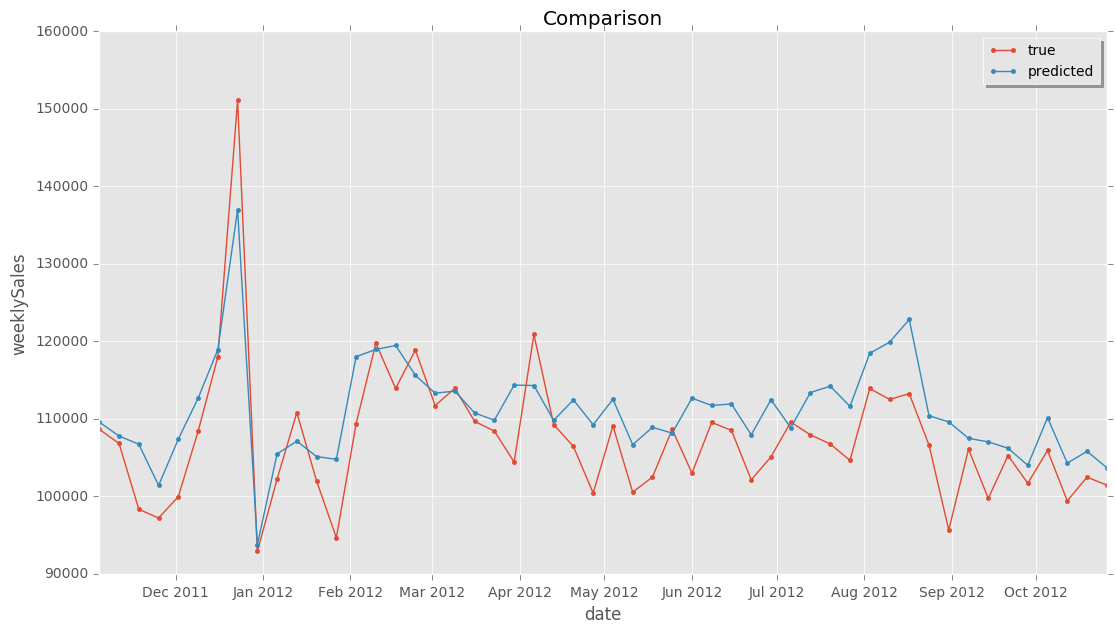

In [16]:
print(mape(inverted))
draw(inverted)

### Q3.2 GPR without normalization

In [17]:
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
# k1 = RBF(length_scale=5)  # long term smooth rising trend
# k2 = ExpSineSquared(length_scale=3, periodicity=12)  # seasonal component
# k3 = WhiteKernel(noise_level=1e-05)  # noise terms
# my_kernel = k1 + k2 + k3
my_kernel = RBF() + ExpSineSquared() + WhiteKernel()
# gp = GaussianProcessRegressor(kernel=my_kernel, alpha=0, optimizer=None, normalize_y=True)
gp = GaussianProcessRegressor(kernel=my_kernel)
temp=np.array(new_train['week']).reshape(-1,1)
gp.fit(temp, dep2train['weeklySales'])
temp=np.array(new_test['week']).reshape(-1,1)
Q32y_pred, Q32y_std = gp.predict(temp, return_std=True)

0.998106655270989


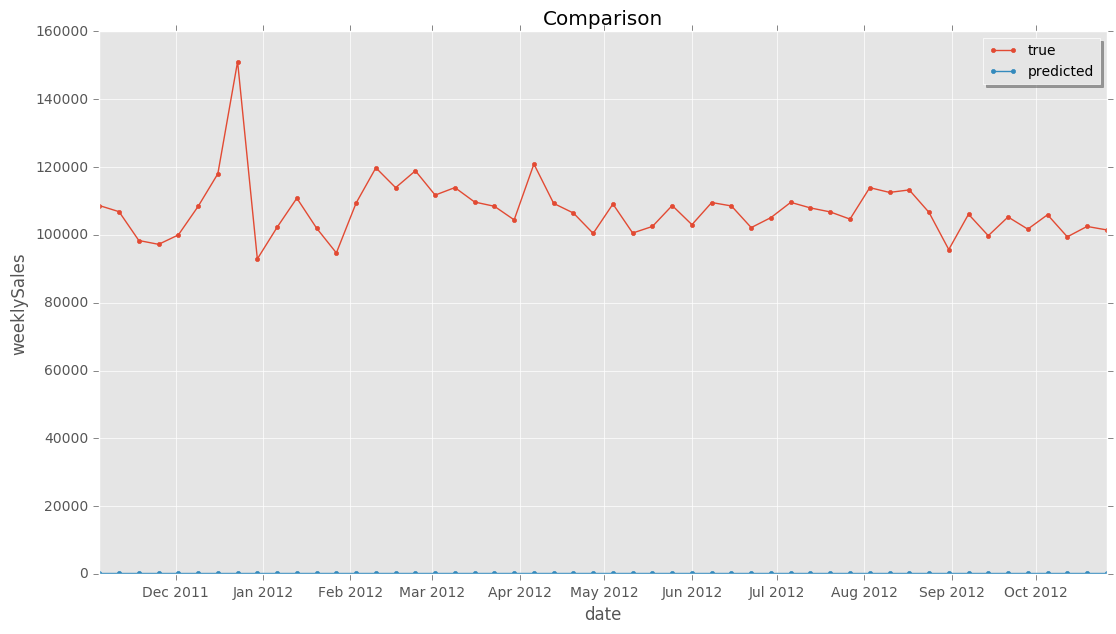

In [18]:
print(mape(Q32y_pred))
draw(Q32y_pred)

### Q3.3 Expanding Window

In [19]:
print(new_train[:5])

        date  weeklySales   fold  week
0 2010-02-05    123952.48  train     5
1 2010-02-12    119209.48  train     6
2 2010-02-19    121430.80  train     7
3 2010-02-26    120292.15  train     8
4 2010-03-05    113163.91  train     9


0.044553489960307564


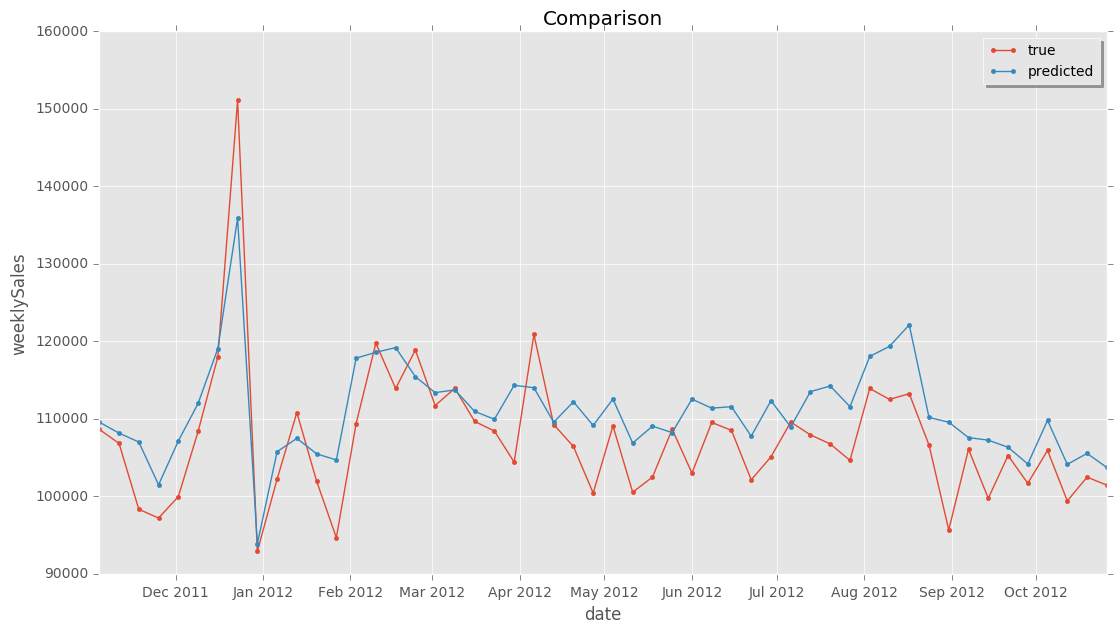

In [20]:
from sklearn.gaussian_process.kernels import RBF, ExpSineSquared, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
my_kernel = RBF() + ExpSineSquared() + WhiteKernel()
gp = GaussianProcessRegressor(kernel=my_kernel)
def GP(train,test,i):
#     k1 = RBF(length_scale=5)  # long term smooth rising trend
#     k2 = ExpSineSquared(length_scale=3, periodicity=12)  # seasonal component
#     k3 = WhiteKernel(noise_level=1e-05)  # noise terms
#     my_kernel = 1.48*k1 + k2 + k3
    X=np.array(train['week']).reshape(-1, 1)
    Y=np.append(x_train_std,x_test_std[:i])
    gp.fit(X,Y)
    X=np.array(test['week']).reshape(-1, 1)
    y_pred, y_std = gp.predict(X, return_std=True)
    inverted = sc.inverse_transform(y_pred)
    return inverted
result=[]
for i in range(new_test.shape[0]):
#     print(np.array(new_train.iloc[i]).reshape(1,-1)[0])
#     print(pd.concat([new_train,new_test.iloc[:i]]).shape)
    result.append(GP(pd.concat([new_train,new_test.iloc[:i]]),new_test.iloc[i],i)[0])
print(mape(np.array(result)))
draw(result)

# Question 4 [Summarize and Discuss]

結論：<br\>
用歷史資料平均來當預測值，可算出baseline的MAPE為0.0436 <br/>
使用Random Forest方法前四期預測的MAPE為0.0596 <br/>
而加入去年同一週的資料則MAPE降低到0.0372 <br/>
可見去年同時期資料很有參考性，資料週期性很強 <br/>
若使用Gaussian process regression則標準化很重要<br/>
標準化後MAPE達0.0449<br/>
未標準化的資料讓MAPE為0.998幾乎接近1<br/>
標準化後再進一步使用expanding window的方法可以讓準確率小幅提升到MAPE為0.044<br/>
RF和GPR放入的資料其實不一樣，一個放入weeklysales一個放入週數<br/>
在此資料集上將序列資料放入Random Forest有較好的結果<br/>

# Bonus Question 4 [My Prediction Model

將extend window裡面前四期加上前一年同週的資料放入回歸模型，<br\>
OLS, Ridge, Lasso全部都表現得比前面的方法好，而且都一樣，沒有看到差別，<br\>
而時間序列的ARIMA比前面的方法都爛，可能是因為資料不夠多，沒有足夠的週期性。

In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
def ridge(x_train, y_train, x_test, y_test):
    a=[0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
    rmses=[]
    for i in a:
        reg=Ridge(alpha=i)
        reg.fit(x_train, y_train)
        ypred=reg.predict(x_test)
        rmses.append(rmse(ypred, y_test))
    index=np.argsort(rmses, kind='mergesort')
    # for i in index:
    #     print(rmses[i])
    draw2(a, rmses)
    best=a[index[0]]#best alpha
    reg=Ridge(alpha=best)
    reg.fit(x_train, y_train)
    ypred=reg.predict(x_test)
    return ypred

def lasso(x_train, y_train, x_test, y_test):
    a=[0.01, 0.1, 1, 5, 10, 20, 50, 100, 500, 1000]
    rmses=[]
    for i in a:
        reg=Lasso(alpha=i)
        reg.fit(x_train, y_train)
        ypred=reg.predict(x_test)
        rmses.append(rmse(ypred, y_test))
    index=np.argsort(rmses, kind='mergesort')
    draw2(a, rmses)
    best=a[index[0]]#best alpha
    reg=Lasso(alpha=best)
    reg.fit(x_train, y_train)
    ypred=reg.predict(x_test)
    return ypred

def draw2(a, rmses):
    fig, ax = plt.subplots(dpi= 130)
    ax.plot(a,rmses,'--b.')
    ax.set(xlabel='alpha', ylabel='RMSE')
    plt.show()
def rmse(ypred, y):
    return np.sqrt(np.mean((ypred-y)**2))

### Ridge

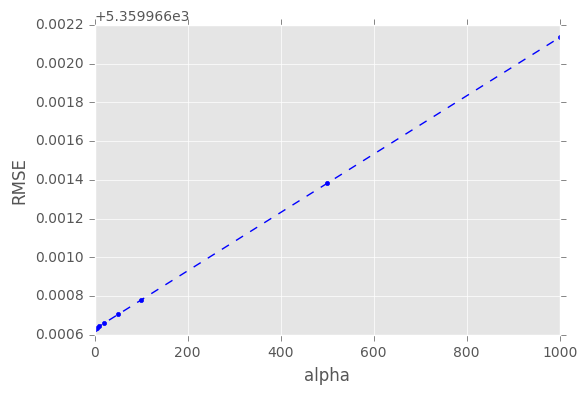

0.033991338981397425


In [22]:
res=ridge(Q22train.drop(columns='weeklySales'),Q22train['weeklySales'],Q22test.drop(columns='weeklySales'),Q22test['weeklySales'])
print(mape(res))

### Lasso

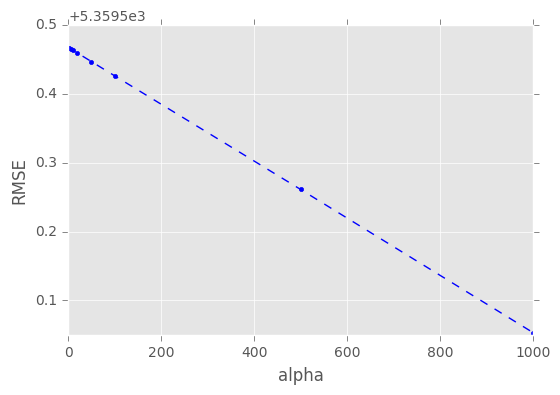

0.03398813831231734


In [23]:
res=lasso(Q22train.drop(columns='weeklySales'),Q22train['weeklySales'],Q22test.drop(columns='weeklySales'),Q22test['weeklySales'])
print(mape(res))

### OLS

In [24]:
import statsmodels.api as sm
model = sm.OLS(Q22train['weeklySales'], sm.tools.add_constant(Q22train.drop(columns='weeklySales'))).fit() 
ols_ypred=model.predict(sm.add_constant(Q22test.drop(columns='weeklySales')))
print(mape(ols_ypred))
# print(rmse(ypred,y_test))

0.033991338981379


/Users/chessy/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### ARIMA

In [25]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(dep2train['weeklySales'],
                           seasonal=True,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
stepwise_model.fit(dep2train['weeklySales'])
future_forecast = stepwise_model.predict(n_periods=52)
print(future_forecast.shape)
print(mape(future_forecast))

/Users/chessy/anaconda3/lib/python3.5/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1882.896, BIC=1887.896, Fit time=0.015 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1877.621, BIC=1885.121, Fit time=0.030 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1878.472, BIC=1885.971, Fit time=0.046 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1880.098, BIC=1890.097, Fit time=0.051 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1880.418, BIC=1890.418, Fit time=0.073 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1880.924, BIC=1893.423, Fit time=0.206 seconds
Total fit time: 0.428 seconds
(52,)
0.11447993303580671


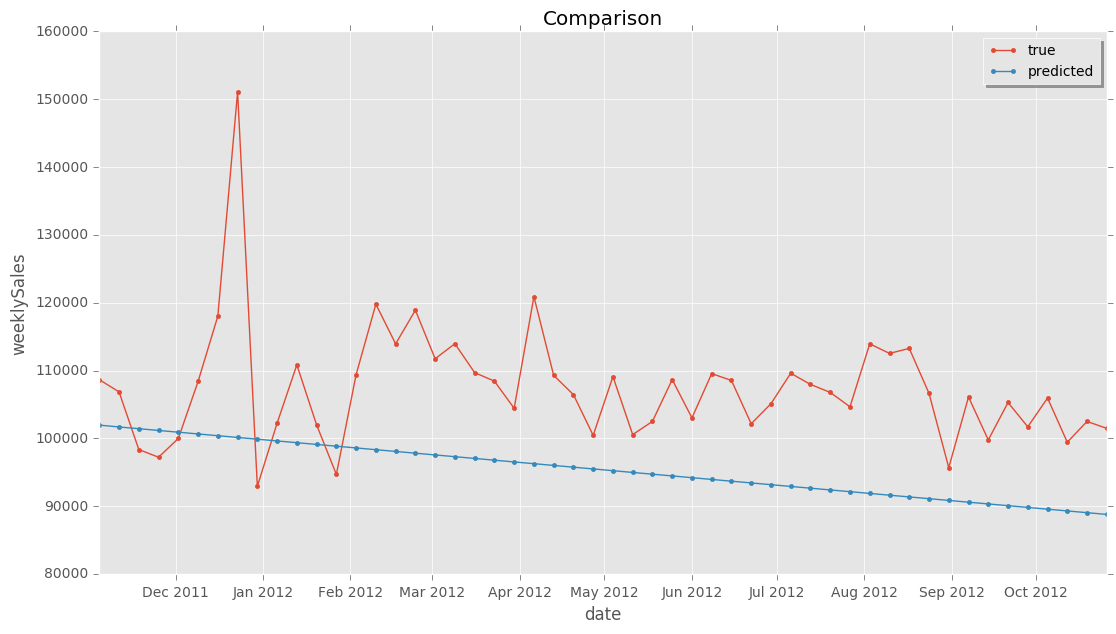

In [26]:
draw(future_forecast)